# **Project Overview**
This project analyzes customer demographic data and banking interactions to derive insights for customer segmentation and marketing strategies. The analysis includes exploratory data analysis (EDA), feature engineering, and a machine learning model (Decision Tree Classifier) to predict customer responses.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   
import seaborn as sns   
from sklearn import tree  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,plot_tree  
from sklearn.pipeline import Pipeline   
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report  

import warnings 
warnings.filterwarnings('ignore') 

## Importing Dataset

In [2]:
data=pd.read_csv("bank-full.csv") 
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [7]:
numerical_cols = data.select_dtypes(include=['int64']).columns

### Customer Demographic data Analysis

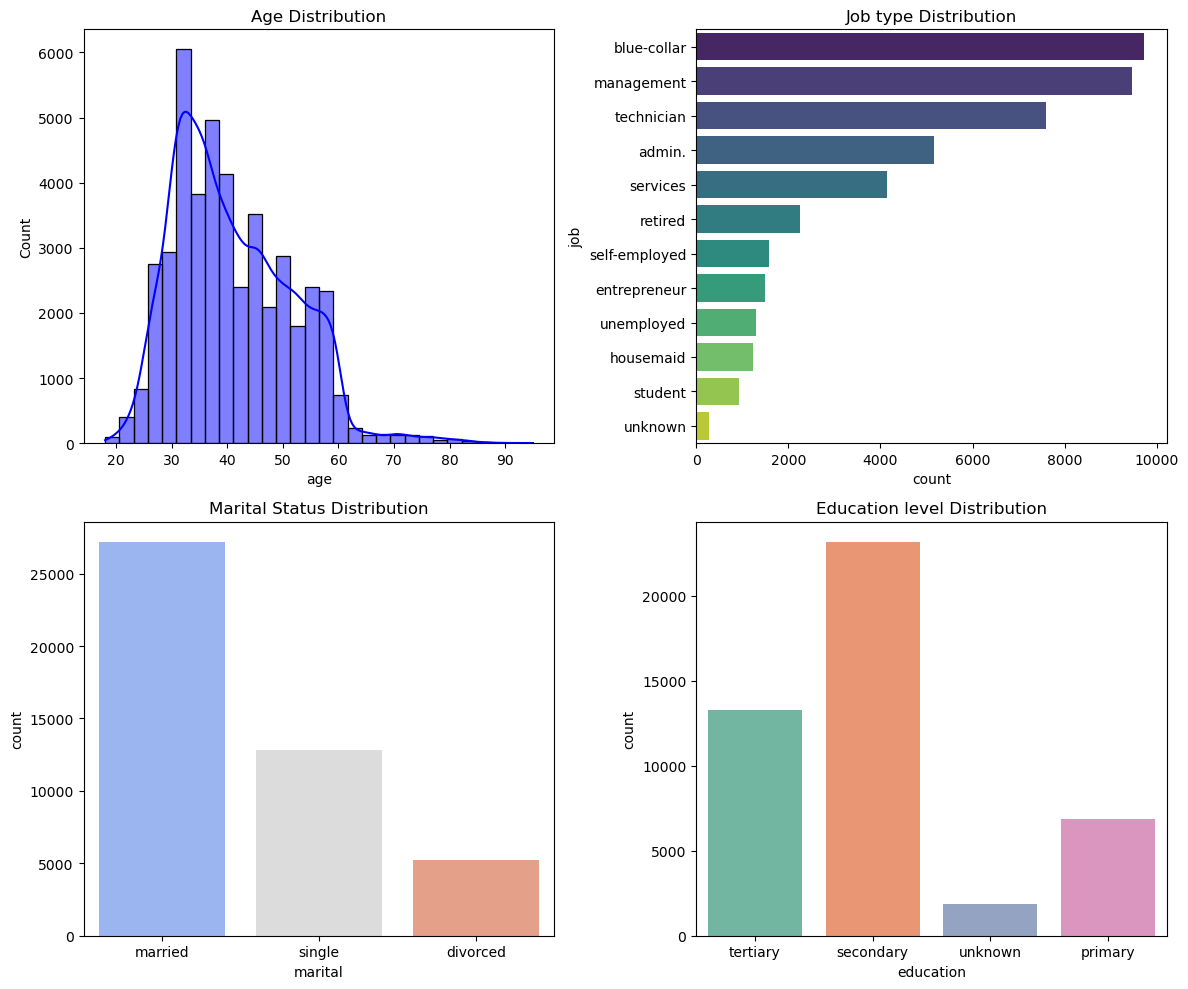

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

sns.histplot(data['age'], bins=30, kde=True,ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Age Distribution")  

sns.countplot(y=data['job'], order=data['job'].value_counts().index, ax=axes[0, 1], palette="viridis") 
axes[0, 1].set_title("Job type Distribution") 

sns.countplot(x=data['marital'],ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Marital Status Distribution") 

sns.countplot(x=data['education'],ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Education level Distribution") 
plt.tight_layout()
plt.show()

### Customer Behavioral data Analysis

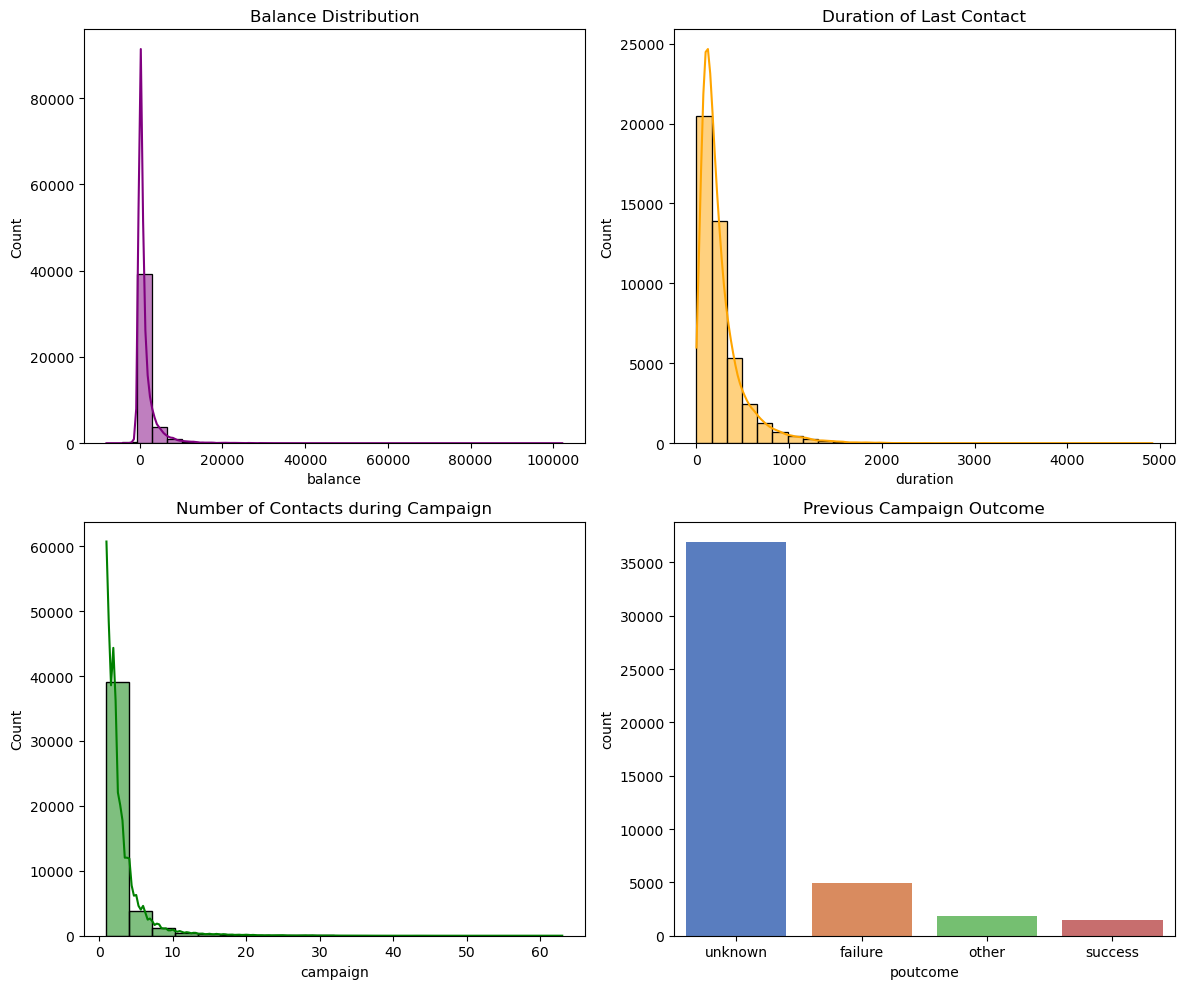

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

sns.histplot(data['balance'], bins=30, kde=True, ax=axes[0, 0], color='purple')
axes[0, 0].set_title("Balance Distribution") 

sns.histplot(data['duration'], bins=30, kde=True,ax=axes[0, 1],  color='orange')
axes[0, 1].set_title("Duration of Last Contact") 

sns.histplot(data['campaign'], bins=20, kde=True,ax=axes[1, 0],color='green')
axes[1, 0].set_title("Number of Contacts during Campaign") 

sns.countplot(x=data['poutcome'], ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("Previous Campaign Outcome") 
plt.tight_layout()
plt.show() 

## Feature Engineering

In [10]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [11]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

## train-test-split

In [12]:
X = data.drop(columns=['y'])
y = data['y'] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(36168, 16)

In [15]:
X_test.shape

(9043, 16)

In [16]:
y_train.shape

(36168,)

In [17]:
y_test.shape

(9043,)

### Handling Class imbalance

In [18]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Model building & Evaluation

In [19]:
clf = DecisionTreeClassifier(random_state=42,max_depth=4)
clf.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=4, random_state=42)

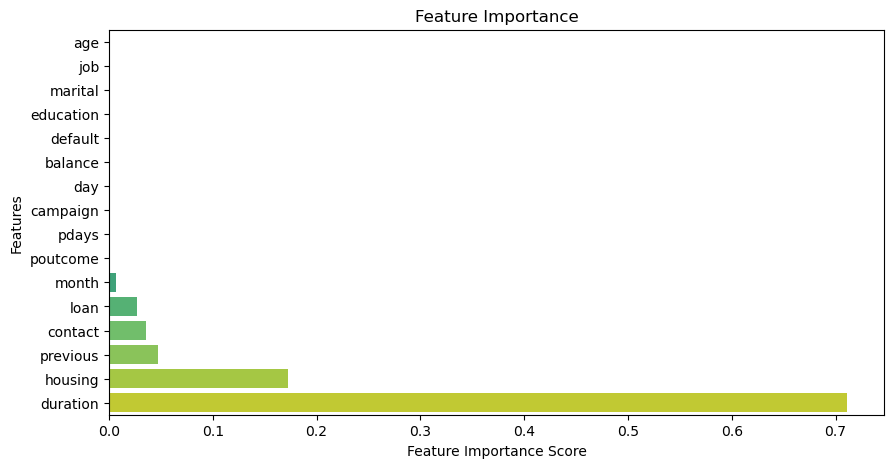

In [20]:
feature_importance = clf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp_df["Importance"], y=feat_imp_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
clf_rprt = classification_report(y_test, y_pred) 
print("The accuracy on the test data:",accuracy)
print("The Classification report:\n",clf_rprt) 

The accuracy on the test data: 0.7936525489328763
The Classification report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87      7952
           1       0.34      0.79      0.48      1091

    accuracy                           0.79      9043
   macro avg       0.65      0.79      0.68      9043
weighted avg       0.89      0.79      0.82      9043



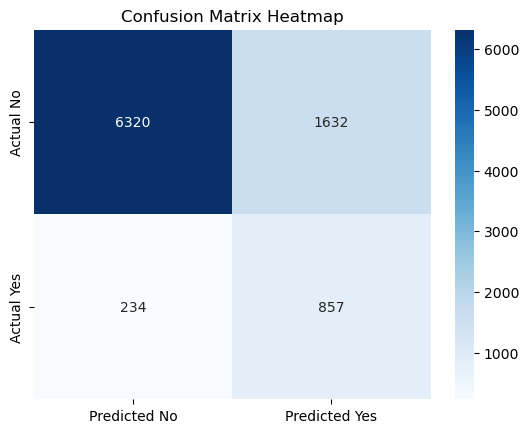

In [23]:
cnf_matrix=confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=["Predicted No", "Predicted Yes"], 
            yticklabels=["Actual No", "Actual Yes"]) 
plt.title("Confusion Matrix Heatmap") 
plt.show() 

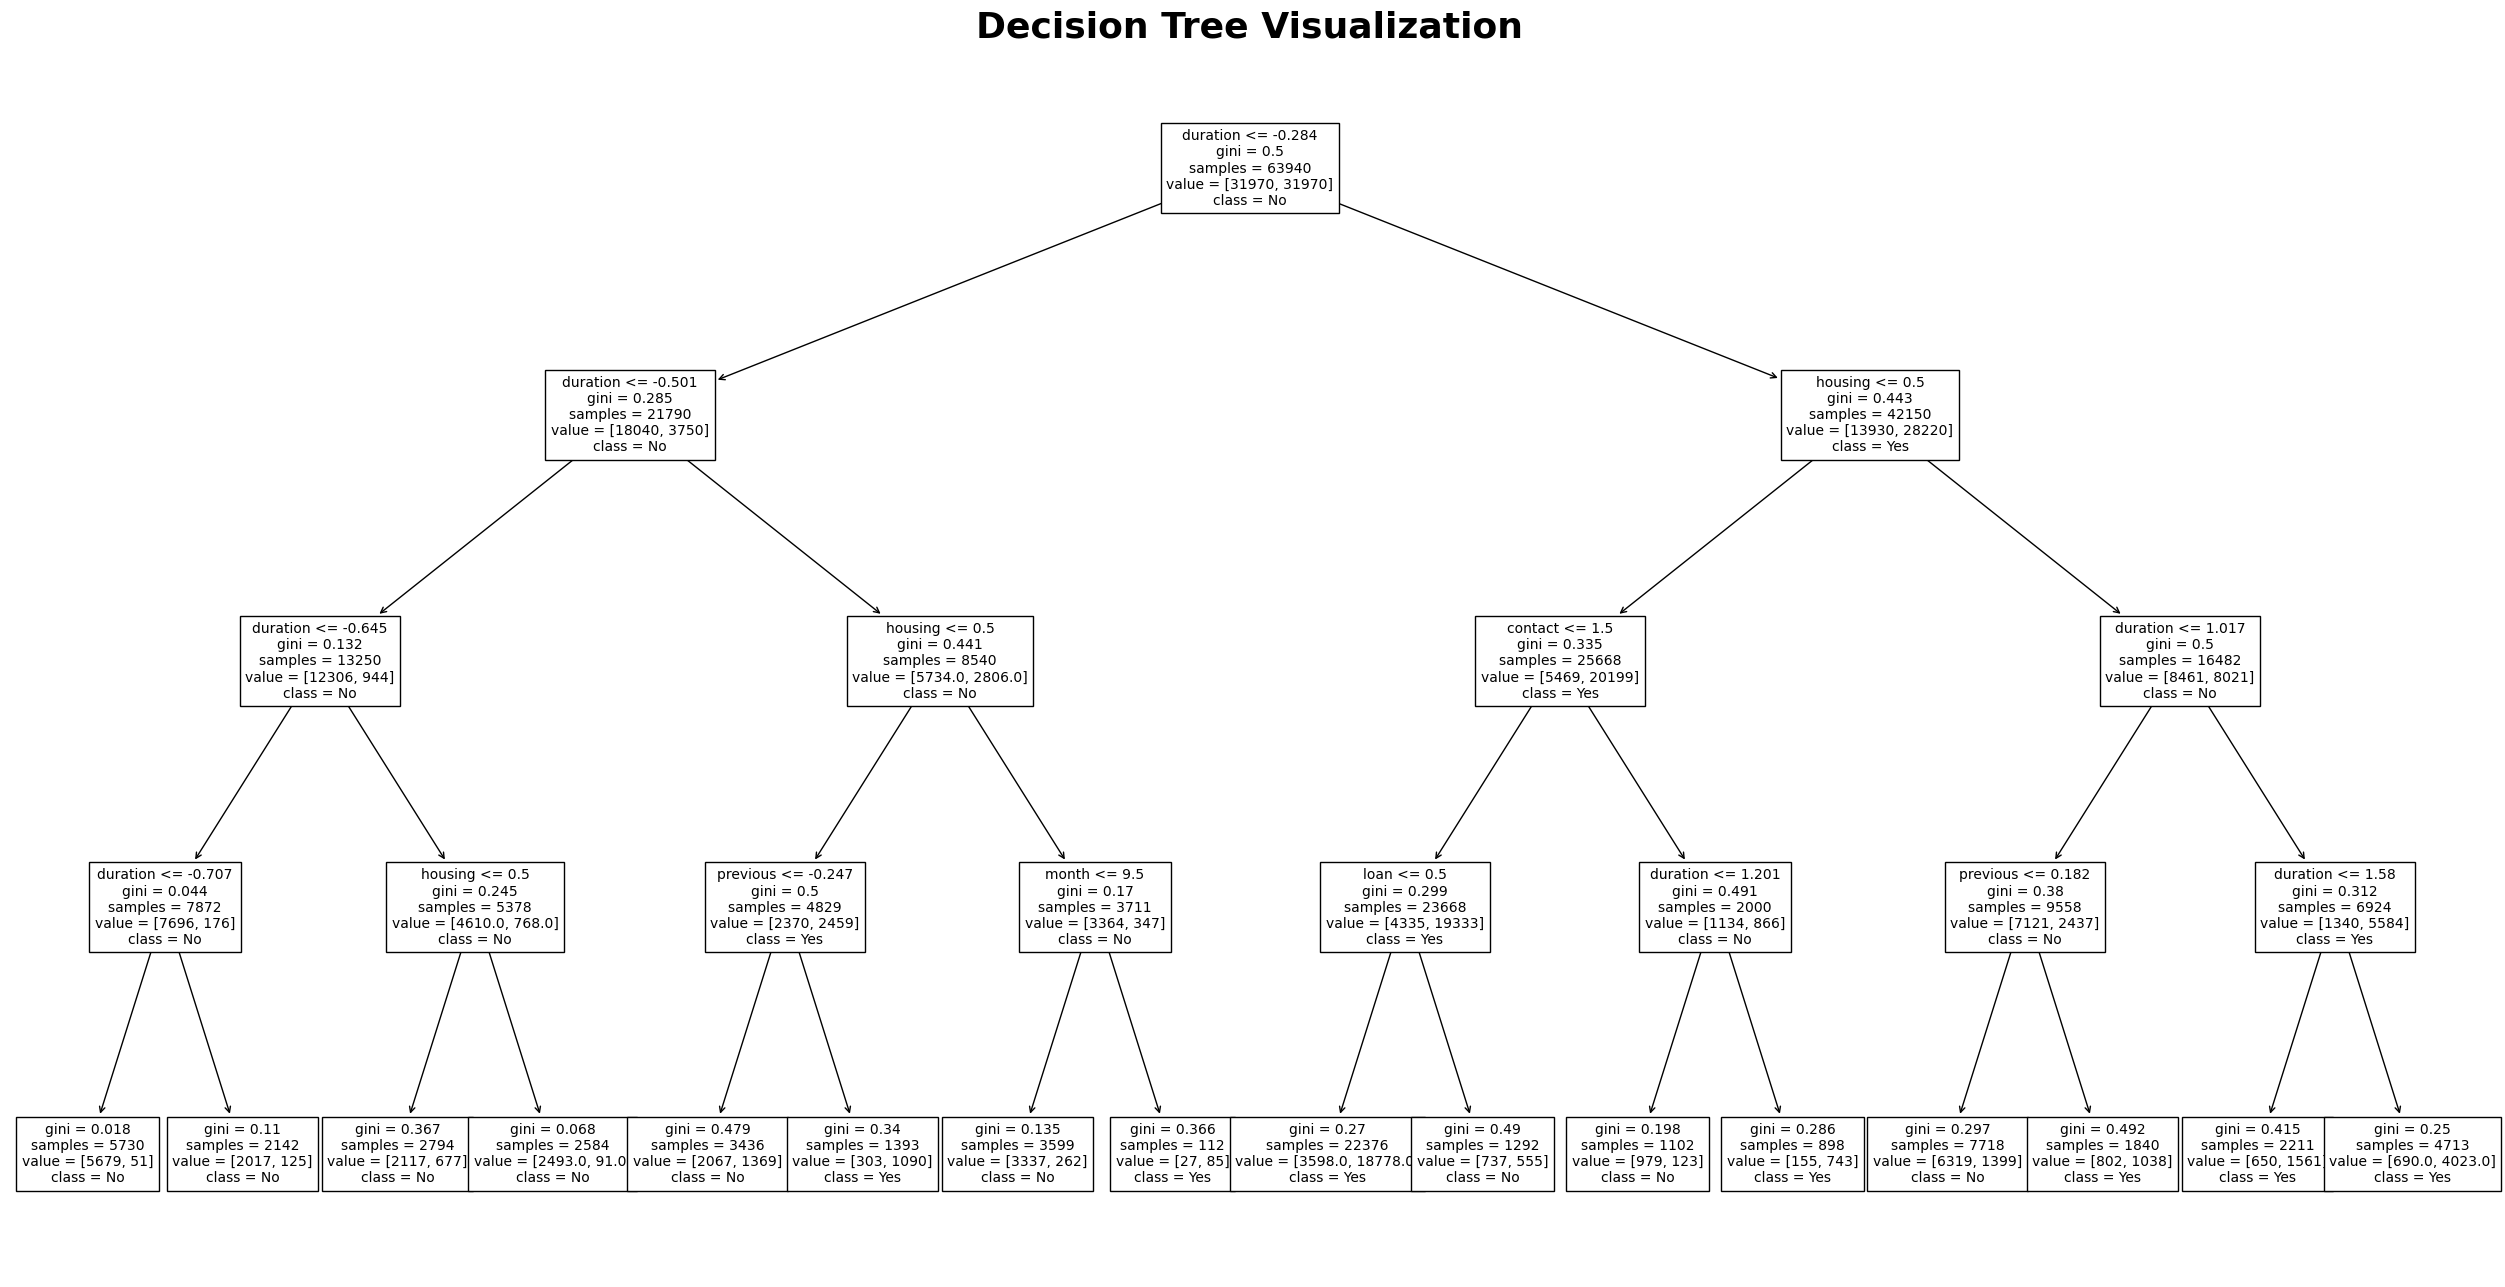

In [24]:
plt.figure(figsize=(32,16))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"],fontsize=10)
plt.title("Decision Tree Visualization",fontsize=26,fontweight='bold')
plt.show()

# **Insights** 
- The dataset contains customer demographic details, job types, and banking interactions.
- EDA revealed key trends such as age distribution, job categories, and correlations between variables.
- The Decision Tree model was implemented to predict customer behavior, achieving an accuracy of **79%**.
- Important features like *Duration of last contact* influencing predictions.

# **Conclusion**
The analysis helps in understanding customer profiles and predicting their likelihood of engaging with banking products. The model's performance suggests that demographic and transactional features significantly impact customer behavior. Future improvements could include hyperparameter tuning and testing additional algorithms for better predictive accuracy.